In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.options.display.float_format = '{:.6f}'.format

In [3]:
infile = "../data/leaderboard-pages-features.csv"

In [4]:
%%time 
NROWS = 10000000
df = pd.read_csv(infile, index_col=0, nrows=NROWS)
print("{} rows".format(df.shape[0]))
print("{} columns".format(df.shape[1]))

263020 rows
54 columns
CPU times: user 3.54 s, sys: 215 ms, total: 3.76 s
Wall time: 3.76 s


In [5]:
df.head(1).T

,1
indexed_at,2017-05-06 04:18:51.105
platform,ps4
stats.casual.deaths,2880
stats.casual.has_played,True
stats.casual.kd,1.087000
stats.casual.kills,3131
stats.casual.losses,321
stats.casual.playtime,809557
stats.casual.wins,610.000000
stats.casual.wlr,1.900000


In [6]:
feature_cols = df.columns[df.columns.str.contains('normalized')].tolist()
feature_cols

['stats.normalized.accuracy',
 'stats.normalized.aggression',
 'stats.normalized.deaths.perhour',
 'stats.normalized.defensive_actions.perhour',
 'stats.normalized.kd',
 'stats.normalized.kills.perhour',
 'stats.normalized.losses.perhour',
 'stats.normalized.mobility',
 'stats.normalized.points.perbullet_fired',
 'stats.normalized.points.perhour',
 'stats.normalized.wins.perhour',
 'stats.normalized.wlr']

In [7]:
df.loc[:,feature_cols].describe()

,stats.normalized.accuracy,stats.normalized.aggression,stats.normalized.deaths.perhour,stats.normalized.defensive_actions.perhour,stats.normalized.kd,stats.normalized.kills.perhour,stats.normalized.losses.perhour,stats.normalized.mobility,stats.normalized.points.perbullet_fired,stats.normalized.points.perhour,stats.normalized.wins.perhour,stats.normalized.wlr
count,263020.000000,263020.000000,263020.000000,263020.000000,263020.000000,263020.000000,263020.000000,263020.000000,263020.000000,263020.000000,263020.000000,263020.000000
mean,0.199578,0.668690,12.426256,17.230009,1.055617,12.816754,1.689019,0.369546,0.030065,17.050553,2.041310,1.312433
std,0.036644,0.087026,1.546399,4.352347,0.333083,3.312938,0.398315,0.803311,0.005919,3.881227,0.357897,0.758188
min,0.055560,0.090285,3.110124,0.996353,0.052686,0.810029,0.035637,0.000002,0.004396,1.461228,0.472275,0.216216
25%,0.174281,0.623094,11.398488,14.415825,0.836914,10.652261,1.436610,0.001097,0.026090,14.554250,1.789895,1.014925
50%,0.197535,0.679676,12.445558,17.203509,1.037037,12.821262,1.652787,0.013121,0.029618,17.125475,1.995812,1.193717
75%,0.222661,0.725365,13.478057,19.939095,1.244326,14.921634,1.915984,0.465018,0.033574,19.554019,2.243296,1.434673
max,0.479809,1.178828,18.599423,49.989338,6.276316,44.656779,4.060759,167.268546,0.121762,51.810387,5.393791,110.000000


In [8]:
df_gameplay = df.ix[:,feature_cols]
df_gameplay.head(1).T

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,1
stats.normalized.accuracy,0.252235
stats.normalized.aggression,0.668391
stats.normalized.deaths.perhour,12.822747
stats.normalized.defensive_actions.perhour,20.069697
stats.normalized.kd,1.088944
stats.normalized.kills.perhour,13.963250
stats.normalized.losses.perhour,1.445430
stats.normalized.mobility,0.000701
stats.normalized.points.perbullet_fired,0.034937
stats.normalized.points.perhour,17.903532


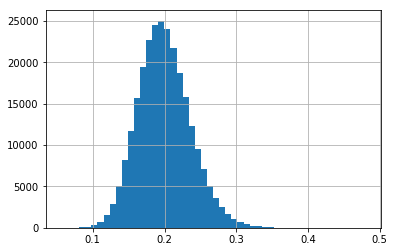

In [9]:
df_gameplay['stats.normalized.accuracy'].hist(bins=50)
plt.show()

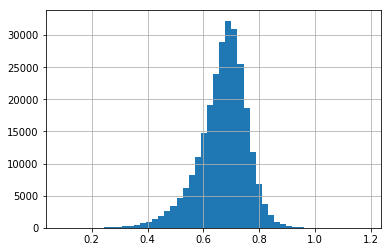

In [10]:
df_gameplay['stats.normalized.aggression'].hist(bins=50)
plt.show()

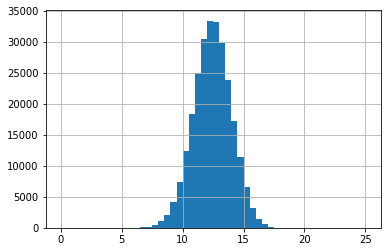

In [11]:
df_gameplay['stats.normalized.deaths.perhour'].hist(bins=50, range=(0,25))
plt.show()

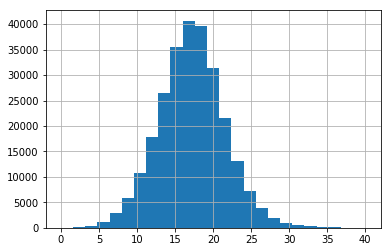

In [12]:
df_gameplay['stats.normalized.defensive_actions.perhour'].hist(bins=25, range=(0,40))
plt.show()

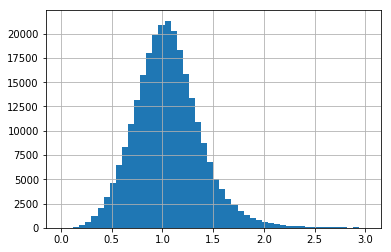

In [13]:
df_gameplay['stats.normalized.kd'].hist(bins=50, range=(0,3))
plt.show()

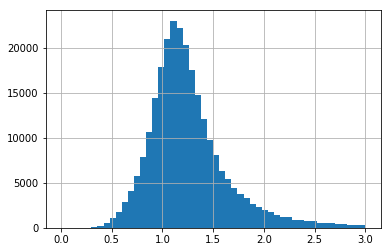

In [14]:
df_gameplay['stats.normalized.wlr'].hist(bins=50, range=(0,3))
plt.show()

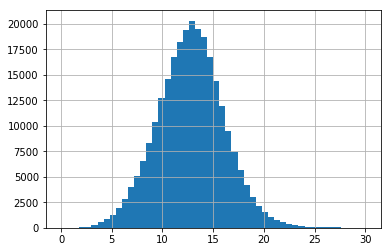

In [15]:
df_gameplay['stats.normalized.kills.perhour'].hist(bins=50, range=(0,30))
plt.show()

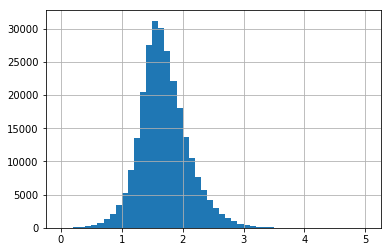

In [16]:
df_gameplay['stats.normalized.losses.perhour'].hist(bins=50, range=(0,5))
plt.show()

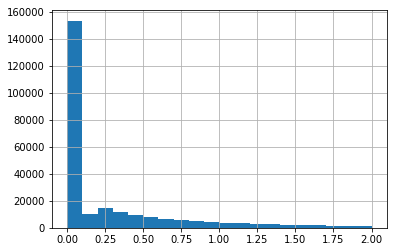

In [17]:
df_gameplay['stats.normalized.mobility'].hist(bins=20, range=(0,2))
plt.show()

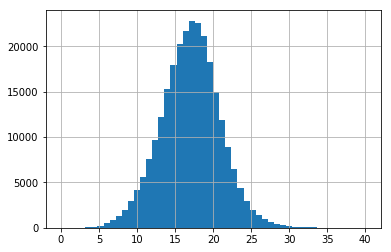

In [18]:
df_gameplay['stats.normalized.points.perhour'].hist(bins=50, range=(0,40))
plt.show()

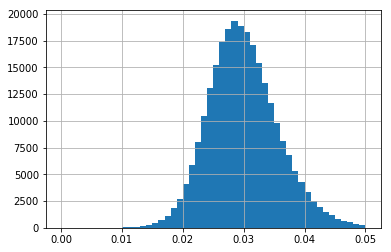

In [19]:
df['stats.normalized.points.perbullet_fired'].hist(bins=50, range=(0,0.05))
plt.show()

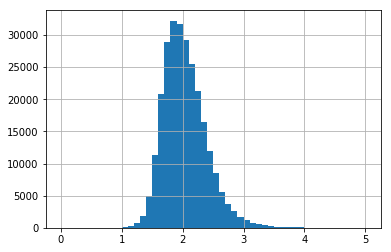

In [20]:
df_gameplay['stats.normalized.wins.perhour'].hist(bins=50, range=(0,5))
plt.show()

In [21]:
from sklearn.decomposition import pca
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [22]:
%%time 
scaler = MinMaxScaler(feature_range=(-1,1), copy=True).fit(df_gameplay)
# scaler = StandardScaler(copy=True).fit(df_gameplay)

X_scaled = pd.DataFrame(scaler.transform(df_gameplay), index=df_gameplay.index, columns=df_gameplay.columns)

reducer = pca.PCA(n_components=2, whiten=True).fit(X_scaled)
X_pca = pd.DataFrame(reducer.transform(X_scaled), index=X_scaled.index, columns=['pca1', 'pca2'])
X_pca.head()

CPU times: user 1.03 s, sys: 363 ms, total: 1.39 s
Wall time: 763 ms


In [23]:
X = X_pca.copy().sample(n=10000).values
X

array([[ 0.91581362, -1.71315885],
       [ 0.11194967,  0.67722277],
       [-0.93895098,  0.80888077],
       ..., 
       [-2.02808967,  0.00642027],
       [-0.04208502,  1.12633289],
       [-1.51058042,  0.55987807]])

In [24]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 4 The average silhouette_score is : 0.295718919892


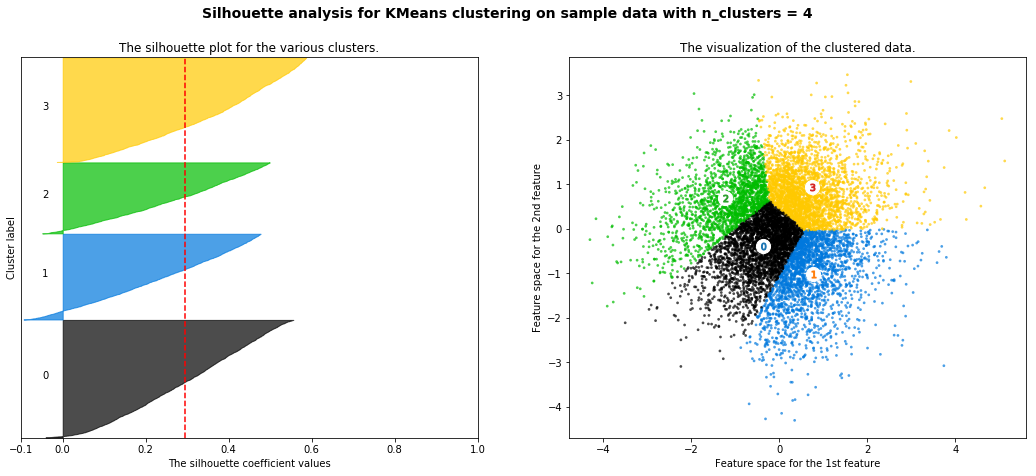

For n_clusters = 5 The average silhouette_score is : 0.293066605404


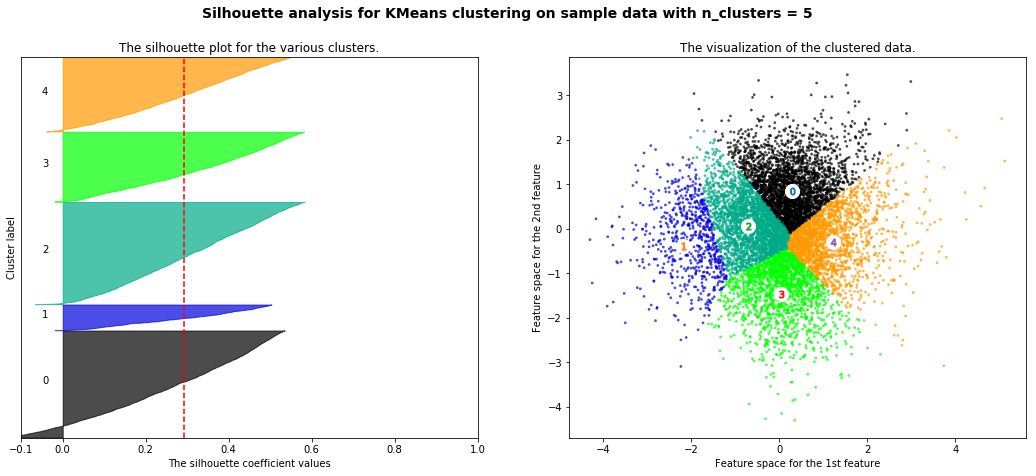

For n_clusters = 6 The average silhouette_score is : 0.301772862374


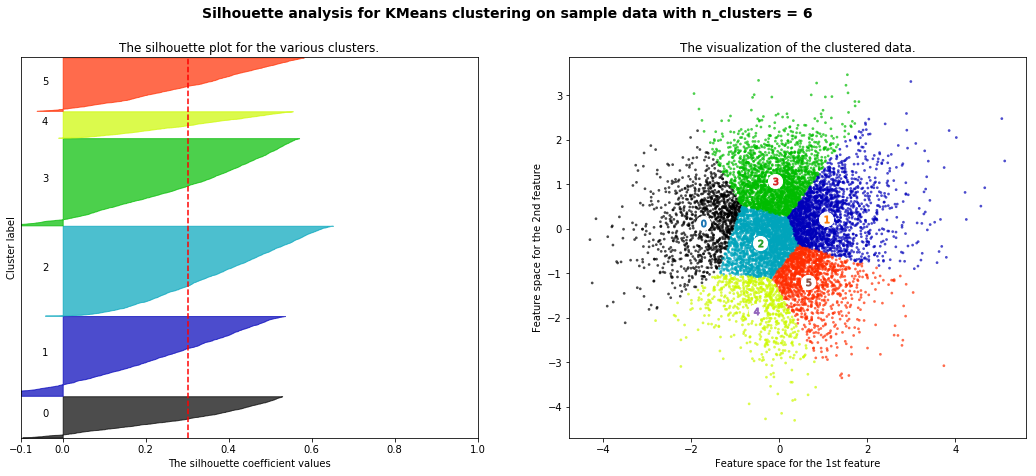

For n_clusters = 7 The average silhouette_score is : 0.303970051745


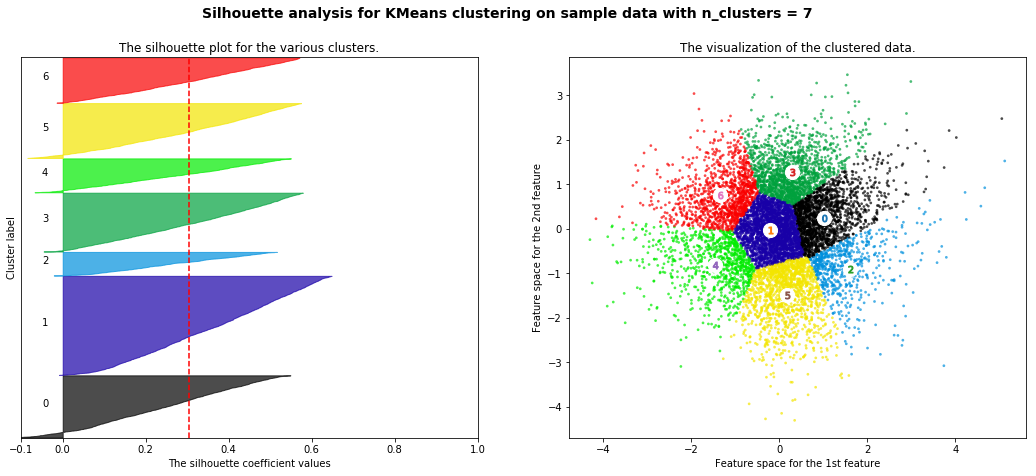

For n_clusters = 8 The average silhouette_score is : 0.292250223693


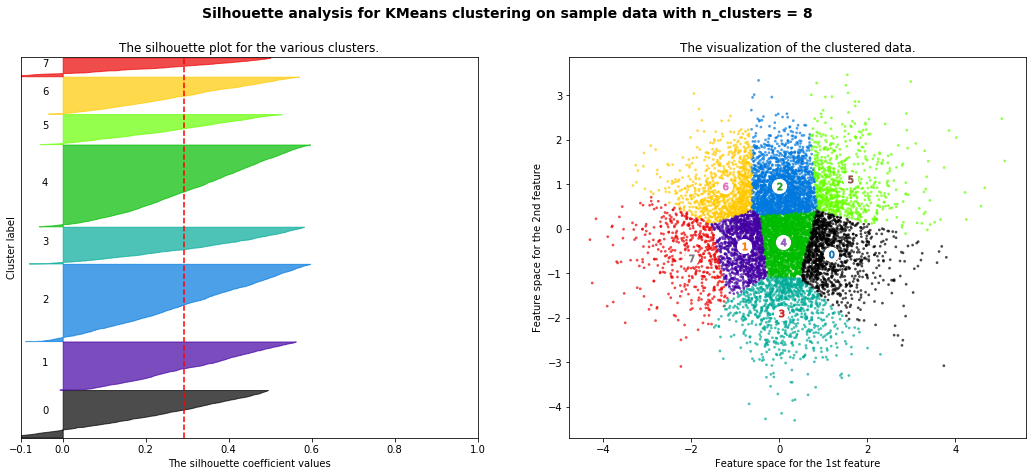

For n_clusters = 9 The average silhouette_score is : 0.294533396749


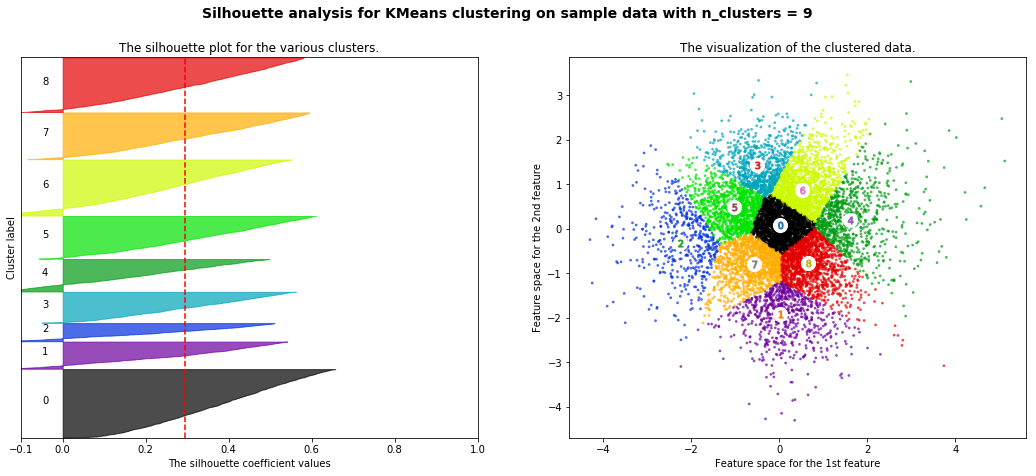

For n_clusters = 10 The average silhouette_score is : 0.294637938481


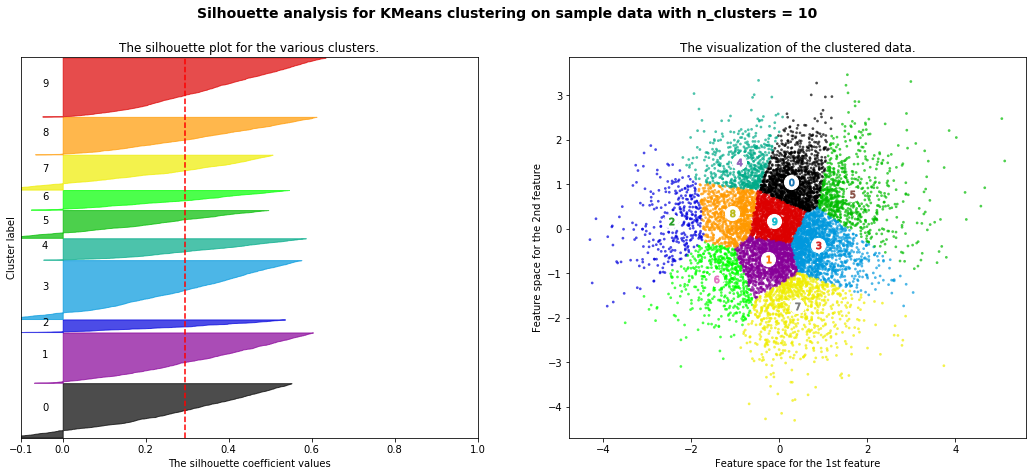

CPU times: user 46.7 s, sys: 10 s, total: 56.7 s
Wall time: 52.4 s


In [25]:
%%time 
range_n_clusters = range(4, 11)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = MiniBatchKMeans(init='k-means++', n_clusters=n_clusters, batch_size=45,
                      n_init=10, max_no_improvement=10, verbose=0)

    # clusterer = KMeans(n_clusters=n_clusters, random_state=10, max_iter=3)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [26]:
print(X[:, 0].mean())
print(X[:, 1].mean())

0.00417184725379
-0.0181774959524


In [27]:
reducer.explained_variance_ratio_

array([ 0.47013428,  0.16670765])

In [28]:
print(df.shape)
print(X_pca.shape)

(263020, 54)
(263020, 2)


In [29]:
%%time 
clusterer = MiniBatchKMeans(init='k-means++', n_clusters=6, batch_size=45,
                  n_init=10, max_no_improvement=10, verbose=0)

# clusterer = KMeans(n_clusters=n_clusters, random_state=10, max_iter=3)
cluster_labels = clusterer.fit_predict(X_pca)

CPU times: user 680 ms, sys: 8.17 ms, total: 688 ms
Wall time: 686 ms


In [30]:
df['label'] = cluster_labels.astype(int)

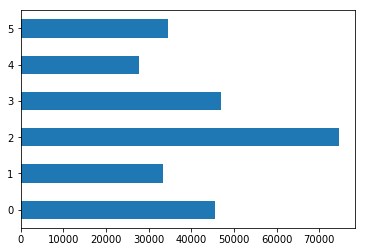

CPU times: user 212 ms, sys: 35.7 ms, total: 248 ms
Wall time: 247 ms


In [31]:
%%time 
pd.value_counts(df['label'], sort=False).plot(kind='barh')
plt.show()